# Working through the Blind Scoring

After taking the 8 quieres and running then through the four different queries from a previous notebook, I was able to blind score each result that was attached to one of the queries. I scored them on a scale of 0 - 10, with:
- **0** – No semantic relationship  
- **1–3** – Minimal semantic overlap  
- **4–6** – Partial or contextual relevance  
- **7–9** – Strong semantic alignment  
- **10** – Exact or near-exact semantic match 

This notebook will now closely lopok my my blind scoring in a couple of different ways. 

In [58]:
import pandas as pd

scores = pd.read_csv("results_scored.csv")

scores = scores.iloc[:, :-2]

In [59]:
scores

,Query,Method,Similarity Score (%),Text,Psalm Num,Verse,HumanScore
0,For the Peace of the world,TFIDF_GLoVe,43.73,Bible,92,1For the day before the Sa...,10.0
1,For the Peace of the world,TFIDF_GLoVe,41.00,Psalter,121,I was glad because of them...,0.0
2,For the Peace of the world,TFIDF_GLoVe,40.99,Bible,121,1An ode of ascents Iwas gl...,8.0
3,For the Peace of the world,TFIDF_GLoVe,38.74,Bible,131,1An ode of ascents Remembe...,4.0
4,For the Peace of the world,TFIDF_GLoVe,38.43,Bible,96,By David when His earth is...,9.0
...,...,...,...,...,...,...,...
187,"Have mercy on me, O God, h...",TFIDF,21.90,Psalter,39,I waited patiently for the...,9.0
188,"Have mercy on me, O God, h...",TFIDF,21.33,Psalter,54,"Give ear to my prayer, O G...",6.0
189,"Have mercy on me, O God, h...",TFIDF,20.87,Psalter,142,"Hear my prayer, O Lord; gi...",9.0
190,"Have mercy on me, O God, h...",TFIDF,19.55,Psalter,68,"Save me, O God, for the wa...",4.0


Among the 8 queires, there are 4 different categories of queires and they are as followed. 

## Querie Categories
#### 1. Simple Keyword Queries
- **Query 1:** mercy

#### 2. Phrase/Exact Match Queries
- **Query 2:** The Lord is my shepherd

#### 3. Thematic/Semantic Queries
- **Query 3:** protection from enemies
- **Query 4:** praise in times of suffering

#### 4. Long/Complex Queries
- **Query 5:** How does the psalmist express trust in God while surrounded by fear and uncertainty?
- **Query 6:** Verses where the psalmist remembers past deliverance and uses it to find hope in present trials.

#### 5. Orthodox Service Quotes
##### From *Vespers*
- **Query 7:** 
    >"Rejoice, O ye heavens, sound the trumpets, ye foundation of the earth, thunder forth gladness, O ye mountains: for behold, Emanuel to    the Cross our sins, and the Giver of Life hath slain death, rasing up Adam,; for He loveth man kind."

- **Query 8:**
    >"“Have mercy on me, O God, have mercy on me. For my soul trusts in Thee, and in the shadow of Thy wings will I hope, until iniquity pass away.”
    
##### From *"The Great Litany"*
- **Query 9**
    >"For the Peace of the world."
    
We are going to be adding these query categories to the data itself before begining analysis. Building in this categorical variable, there is a further breakdown that can be done inorder to find results and conclusions.

In [60]:
QUERY_TO_CATEGORY = {
    "mercy": "Simple Keyword Queries",
    "The Lord is my shepherd": "Phrase/Exact Match Queries",
    "protection from enemies": "Thematic/Semantic Queries",
    "praise in times of suffering": "Thematic/Semantic Queries",
    "How does the psalmist express trust in God while surrounded by fear and uncertainty?":
        "Long/Complex Queries",
    "Verses where the psalmist remembers past deliverance and uses it to find hope in present trials.":
        "Long/Complex Queries",
    "Rejoice, O ye heavens, sound the trumpets, ye foundation of the earth, thunder forth gladness, O ye mountains: for behold, Emanuel to the Cross our sins, and the Giver of Life hath slain death, raising up Adam; for He loveth mankind.":
        "Orthodox Service Quotes",
    "Have mercy on me, O God, have mercy on me. For my soul trusts in Thee, and in the shadow of Thy wings will I hope, until iniquity pass away.":
        "Orthodox Service Quotes",
    "For the Peace of the world": "Orthodox Service Quotes"
}

In [61]:
scores["Query Category"] = scores["Query"].map(QUERY_TO_CATEGORY)
scores

,Query,Method,Similarity Score (%),Text,Psalm Num,Verse,HumanScore,Query Category
0,For the Peace of the world,TFIDF_GLoVe,43.73,Bible,92,1For the day before the Sa...,10.0,Orthodox Service Quotes
1,For the Peace of the world,TFIDF_GLoVe,41.00,Psalter,121,I was glad because of them...,0.0,Orthodox Service Quotes
2,For the Peace of the world,TFIDF_GLoVe,40.99,Bible,121,1An ode of ascents Iwas gl...,8.0,Orthodox Service Quotes
3,For the Peace of the world,TFIDF_GLoVe,38.74,Bible,131,1An ode of ascents Remembe...,4.0,Orthodox Service Quotes
4,For the Peace of the world,TFIDF_GLoVe,38.43,Bible,96,By David when His earth is...,9.0,Orthodox Service Quotes
...,...,...,...,...,...,...,...,...
187,"Have mercy on me, O God, h...",TFIDF,21.90,Psalter,39,I waited patiently for the...,9.0,Orthodox Service Quotes
188,"Have mercy on me, O God, h...",TFIDF,21.33,Psalter,54,"Give ear to my prayer, O G...",6.0,Orthodox Service Quotes
189,"Have mercy on me, O God, h...",TFIDF,20.87,Psalter,142,"Hear my prayer, O Lord; gi...",9.0,Orthodox Service Quotes
190,"Have mercy on me, O God, h...",TFIDF,19.55,Psalter,68,"Save me, O God, for the wa...",4.0,Orthodox Service Quotes


In [62]:
# reordering the columns of the dataframe
scores = scores [["Query", "Query Category", "Method", "Text", "Psalm Num", 
                  "Verse", "HumanScore", "Similarity Score (%)"]]

scores

,Query,Query Category,Method,Text,Psalm Num,Verse,HumanScore,Similarity Score (%)
0,For the Peace of the world,Orthodox Service Quotes,TFIDF_GLoVe,Bible,92,1For the day before the Sa...,10.0,43.73
1,For the Peace of the world,Orthodox Service Quotes,TFIDF_GLoVe,Psalter,121,I was glad because of them...,0.0,41.00
2,For the Peace of the world,Orthodox Service Quotes,TFIDF_GLoVe,Bible,121,1An ode of ascents Iwas gl...,8.0,40.99
3,For the Peace of the world,Orthodox Service Quotes,TFIDF_GLoVe,Bible,131,1An ode of ascents Remembe...,4.0,38.74
4,For the Peace of the world,Orthodox Service Quotes,TFIDF_GLoVe,Bible,96,By David when His earth is...,9.0,38.43
...,...,...,...,...,...,...,...,...
187,"Have mercy on me, O God, h...",Orthodox Service Quotes,TFIDF,Psalter,39,I waited patiently for the...,9.0,21.90
188,"Have mercy on me, O God, h...",Orthodox Service Quotes,TFIDF,Psalter,54,"Give ear to my prayer, O G...",6.0,21.33
189,"Have mercy on me, O God, h...",Orthodox Service Quotes,TFIDF,Psalter,142,"Hear my prayer, O Lord; gi...",9.0,20.87
190,"Have mercy on me, O God, h...",Orthodox Service Quotes,TFIDF,Psalter,68,"Save me, O God, for the wa...",4.0,19.55


## Numbering the Results 
I also want to be able to reference the order of the results within each search. I collected the top 5 results from each search. There was a bug in my code that took the top 6 results from searches. I am going to just worry about the top 5 results to keep everything fair. 

In [63]:
# temporary dataframe to not break the original 
temp = scores.copy()

# aqdding a column to number the indivudal results
temp['numbered_result'] = pd.NA
temp

,Query,Query Category,Method,Text,Psalm Num,Verse,HumanScore,Similarity Score (%),numbered_result
0,For the Peace of the world,Orthodox Service Quotes,TFIDF_GLoVe,Bible,92,1For the day before the Sa...,10.0,43.73,NaN
1,For the Peace of the world,Orthodox Service Quotes,TFIDF_GLoVe,Psalter,121,I was glad because of them...,0.0,41.00,NaN
2,For the Peace of the world,Orthodox Service Quotes,TFIDF_GLoVe,Bible,121,1An ode of ascents Iwas gl...,8.0,40.99,NaN
3,For the Peace of the world,Orthodox Service Quotes,TFIDF_GLoVe,Bible,131,1An ode of ascents Remembe...,4.0,38.74,NaN
4,For the Peace of the world,Orthodox Service Quotes,TFIDF_GLoVe,Bible,96,By David when His earth is...,9.0,38.43,NaN
...,...,...,...,...,...,...,...,...,...
187,"Have mercy on me, O God, h...",Orthodox Service Quotes,TFIDF,Psalter,39,I waited patiently for the...,9.0,21.90,NaN
188,"Have mercy on me, O God, h...",Orthodox Service Quotes,TFIDF,Psalter,54,"Give ear to my prayer, O G...",6.0,21.33,NaN
189,"Have mercy on me, O God, h...",Orthodox Service Quotes,TFIDF,Psalter,142,"Hear my prayer, O Lord; gi...",9.0,20.87,NaN
190,"Have mercy on me, O God, h...",Orthodox Service Quotes,TFIDF,Psalter,68,"Save me, O God, for the wa...",4.0,19.55,NaN


In [64]:
n = temp.shape[0]

# starting with the number 1 result of a query
num_result = 1

query = temp["Query"].iloc[0]
method = temp["Method"].iloc[0]

for i in range(n):
    # checking if we are in the same group fo data to be numbered
    if query == temp["Query"].iloc[i] and method == temp["Method"].iloc[i]:
        temp["numbered_result"].iloc[i] = num_result
        num_result += 1
        
    # in an new group of results
    else:
        # the current result is the number result for the new set of results
        temp["numbered_result"].iloc[i] = 1
        # reset the number result
        num_result = 2
        # update to the new target query & method
        query = temp["Query"].iloc[i]
        method = temp["Method"].iloc[i]

/tmp/ipykernel_101/3907079077.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp["numbered_result"].iloc[i] = num_result
/tmp/ipykernel_101/3907079077.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp["numbered_result"].iloc[i] = 1


In [65]:

pd.set_option("display.max_rows", 100)
pd.set_option("display.max_columns", 50)
pd.set_option("display.max_colwidth", 30)

#temp.head(100)


In [66]:
pd.set_option("display.max_rows", 20)

In [67]:
# updating the original dataframe with the numbered results
scores = temp
scores

,Query,Query Category,Method,Text,Psalm Num,Verse,HumanScore,Similarity Score (%),numbered_result
0,For the Peace of the world,Orthodox Service Quotes,TFIDF_GLoVe,Bible,92,1For the day before the Sa...,10.0,43.73,1
1,For the Peace of the world,Orthodox Service Quotes,TFIDF_GLoVe,Psalter,121,I was glad because of them...,0.0,41.00,2
2,For the Peace of the world,Orthodox Service Quotes,TFIDF_GLoVe,Bible,121,1An ode of ascents Iwas gl...,8.0,40.99,3
3,For the Peace of the world,Orthodox Service Quotes,TFIDF_GLoVe,Bible,131,1An ode of ascents Remembe...,4.0,38.74,4
4,For the Peace of the world,Orthodox Service Quotes,TFIDF_GLoVe,Bible,96,By David when His earth is...,9.0,38.43,5
...,...,...,...,...,...,...,...,...,...
187,"Have mercy on me, O God, h...",Orthodox Service Quotes,TFIDF,Psalter,39,I waited patiently for the...,9.0,21.90,2
188,"Have mercy on me, O God, h...",Orthodox Service Quotes,TFIDF,Psalter,54,"Give ear to my prayer, O G...",6.0,21.33,3
189,"Have mercy on me, O God, h...",Orthodox Service Quotes,TFIDF,Psalter,142,"Hear my prayer, O Lord; gi...",9.0,20.87,4
190,"Have mercy on me, O God, h...",Orthodox Service Quotes,TFIDF,Psalter,68,"Save me, O God, for the wa...",4.0,19.55,5


In [68]:
# reordering the columns
scores = scores [["Query", "Query Category", "Method", "numbered_result", "Text", "Psalm Num", 
                  "Verse", "HumanScore", "Similarity Score (%)"]]
scores

,Query,Query Category,Method,numbered_result,Text,Psalm Num,Verse,HumanScore,Similarity Score (%)
0,For the Peace of the world,Orthodox Service Quotes,TFIDF_GLoVe,1,Bible,92,1For the day before the Sa...,10.0,43.73
1,For the Peace of the world,Orthodox Service Quotes,TFIDF_GLoVe,2,Psalter,121,I was glad because of them...,0.0,41.00
2,For the Peace of the world,Orthodox Service Quotes,TFIDF_GLoVe,3,Bible,121,1An ode of ascents Iwas gl...,8.0,40.99
3,For the Peace of the world,Orthodox Service Quotes,TFIDF_GLoVe,4,Bible,131,1An ode of ascents Remembe...,4.0,38.74
4,For the Peace of the world,Orthodox Service Quotes,TFIDF_GLoVe,5,Bible,96,By David when His earth is...,9.0,38.43
...,...,...,...,...,...,...,...,...,...
187,"Have mercy on me, O God, h...",Orthodox Service Quotes,TFIDF,2,Psalter,39,I waited patiently for the...,9.0,21.90
188,"Have mercy on me, O God, h...",Orthodox Service Quotes,TFIDF,3,Psalter,54,"Give ear to my prayer, O G...",6.0,21.33
189,"Have mercy on me, O God, h...",Orthodox Service Quotes,TFIDF,4,Psalter,142,"Hear my prayer, O Lord; gi...",9.0,20.87
190,"Have mercy on me, O God, h...",Orthodox Service Quotes,TFIDF,5,Psalter,68,"Save me, O God, for the wa...",4.0,19.55


In [69]:
scores = scores.rename(columns={"HumanScore": "Human Score"})

In [73]:
# filtering to only be studying the top 5 results from each query
scores = scores[scores['numbered_result'] != 6]


pd.set_option("display.max_rows", 200)

scores[scores['Method'] == 'TFIDF']

,Query,Query Category,Method,numbered_result,Text,Psalm Num,Verse,Human Score,Similarity Score (%)
144,mercy,Simple Keyword Queries,TFIDF,1,Psalter,135,O give thanks unto the Lor...,7.0,33.96
145,mercy,Simple Keyword Queries,TFIDF,2,Bible,135,1Alleluia Give thanks to t...,7.0,30.36
146,mercy,Simple Keyword Queries,TFIDF,3,Bible,56,1For the End corrupt not b...,4.0,21.89
147,mercy,Simple Keyword Queries,TFIDF,4,Psalter,122,Unto Thee have I lifted up...,2.0,19.24
148,mercy,Simple Keyword Queries,TFIDF,5,Bible,102,By David Bless the Lord O ...,9.0,16.78
150,The Lord is my shepherd,Phrase/Exact Match Queries,TFIDF,1,Psalter,145,"Praise the Lord, O my soul...",4.0,15.55
151,The Lord is my shepherd,Phrase/Exact Match Queries,TFIDF,2,Psalter,137,"I will give Thee thanks, O...",9.0,11.46
152,The Lord is my shepherd,Phrase/Exact Match Queries,TFIDF,3,Bible,2,Why do the nations rage An...,9.0,10.65
153,The Lord is my shepherd,Phrase/Exact Match Queries,TFIDF,4,Bible,22,A psalm by David The Lord ...,10.0,10.59
154,The Lord is my shepherd,Phrase/Exact Match Queries,TFIDF,5,Psalter,27,"Unto Thee will I cry, O Lo...",8.0,10.59


## Quick Adjustment of the Data
I have relaized that I completely forgot to add the results from **TF_IDF** to the blind scoring. TO fix this I am going to omit the query in total. Trying to blindly score the last 5 results, without bias will be difficult

In [74]:
scores = scores[scores['Query'] != "For the Peace of the world"]

scores

,Query,Query Category,Method,numbered_result,Text,Psalm Num,Verse,Human Score,Similarity Score (%)
16,mercy,Simple Keyword Queries,TFIDF_GLoVe,1,Bible,135,1Alleluia Give thanks to t...,8.0,82.61
17,mercy,Simple Keyword Queries,TFIDF_GLoVe,2,Psalter,135,O give thanks unto the Lor...,9.0,82.19
18,mercy,Simple Keyword Queries,TFIDF_GLoVe,3,Bible,117,Alleluia Give thanks to th...,9.0,69.03
19,mercy,Simple Keyword Queries,TFIDF_GLoVe,4,Bible,102,By David Bless the Lord O ...,10.0,66.82
20,mercy,Simple Keyword Queries,TFIDF_GLoVe,5,Psalter,117,O give thanks unto the Lor...,10.0,66.30
22,mercy,Simple Keyword Queries,BERT,1,Psalter,42,"Judge me, God, and give ju...",6.0,99.47
23,mercy,Simple Keyword Queries,BERT,2,Psalter,99,Shout with jubilation unto...,1.0,99.47
24,mercy,Simple Keyword Queries,BERT,3,Psalter,149,Sing unto the Lord a new s...,0.0,99.47
25,mercy,Simple Keyword Queries,BERT,4,Bible,12,For the End a psalm by Dav...,7.0,99.46
26,mercy,Simple Keyword Queries,BERT,5,Bible,16,A prayer of David Listen O...,6.0,99.46


## Analysis 

With all of the inital proccessing and cleaning done, we are start to look at the data and work at drawing conclusions. 

### Overall results

In [85]:
overall = pd.pivot_table(scores, index=["Method"], values="Human Score", aggfunc='mean')
overall

,Human Score
Method,
BERT,6.700
SBERT,5.075
TFIDF,5.950
TFIDF_GLoVe,5.975


In [86]:
pd.pivot_table(scores, index=["Method"], values="Human Score", aggfunc='count
               ')


,Human Score
Method,
BERT,40
SBERT,40
TFIDF,40
TFIDF_GLoVe,40


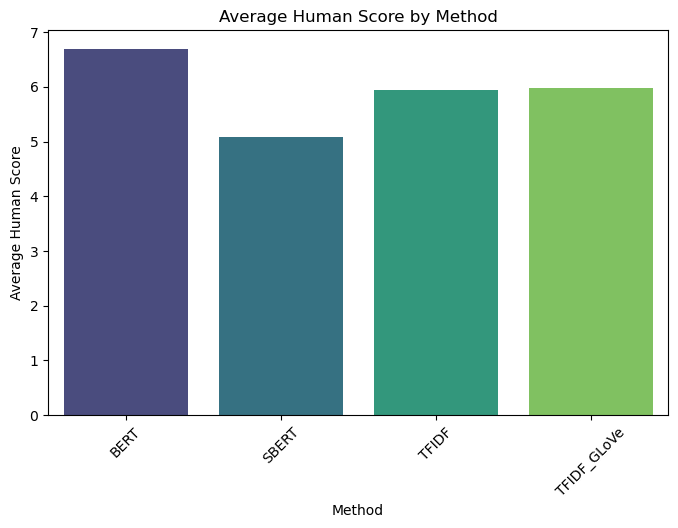

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by Method and compute mean
method_avg = scores.groupby('Method')['Human Score'].mean().reset_index()

# Bar plot
plt.figure(figsize=(8,5))
sns.barplot(
    data=method_avg,
    x='Method',
    y='Human Score',
    palette='viridis'
)
plt.title("Average Human Score by Method")
plt.ylabel("Average Human Score")
plt.xlabel("Method")
plt.xticks(rotation=45)
plt.show()


### Each Method per Query

In [79]:
pd.pivot_table(scores, index=["Method", "Query"], values="Human Score", aggfunc='mean')

Human Score
Method      Query                                      
BERT        Have mercy on me, O God, ha...          8.2
            How does the psalmist expre...          6.4
            Rejoice, O ye heavens, soun...          7.0
            The Lord is my shepherd                 6.2
            Verses where the psalmist r...          7.0
            mercy                                   4.0
            praise in times of suffering            5.6
            protection from enemies                 9.2
SBERT       Have mercy on me, O God, ha...          5.2
            How does the psalmist expre...          6.0
            Rejoice, O ye heavens, soun...          6.4
            The Lord is my shepherd                 4.0
            Verses where the psalmist r...          6.8
            mercy                                   3.4
            praise in times of suffering            3.6
            protection from enemies                 5.2
TFIDF       Have mercy on me, O God, ha...          7.4
            How does the psalmist expre...          6.4
            Rejoice, O ye heavens, soun...          5.4
            The Lord is my shepherd                 8.0
            Verses where the psalmist r...          3.2
            mercy                                   5.8
            praise in times of suffering            4.6
            protection from enemies                 6.8
TFIDF_GLoVe Have mercy on me, O God, ha...          6.2
            How does the psalmist expre...          6.2
            Rejoice, O ye heavens, soun...          7.4
            The Lord is my shepherd                 3.6
            Verses where the psalmist r...          5.0
            mercy                                   9.2
            praise in times of suffering            5.0
            protection from enemies                 5.2

In [80]:
pd.pivot_table(scores, index=["Method", "Query Category"], values="Human Score", aggfunc='mean')

Human Score
Method      Query Category                         
BERT        Long/Complex Queries                6.7
            Orthodox Service Quotes             8.2
            Phrase/Exact Match Queries          6.2
            Simple Keyword Queries              4.0
            Thematic/Semantic Queries           7.4
SBERT       Long/Complex Queries                6.4
            Orthodox Service Quotes             5.2
            Phrase/Exact Match Queries          4.0
            Simple Keyword Queries              3.4
            Thematic/Semantic Queries           4.4
TFIDF       Long/Complex Queries                4.8
            Orthodox Service Quotes             7.4
            Phrase/Exact Match Queries          8.0
            Simple Keyword Queries              5.8
            Thematic/Semantic Queries           5.7
TFIDF_GLoVe Long/Complex Queries                5.6
            Orthodox Service Quotes             6.2
            Phrase/Exact Match Queries          3.6
            Simple Keyword Queries              9.2
            Thematic/Semantic Queries           5.1

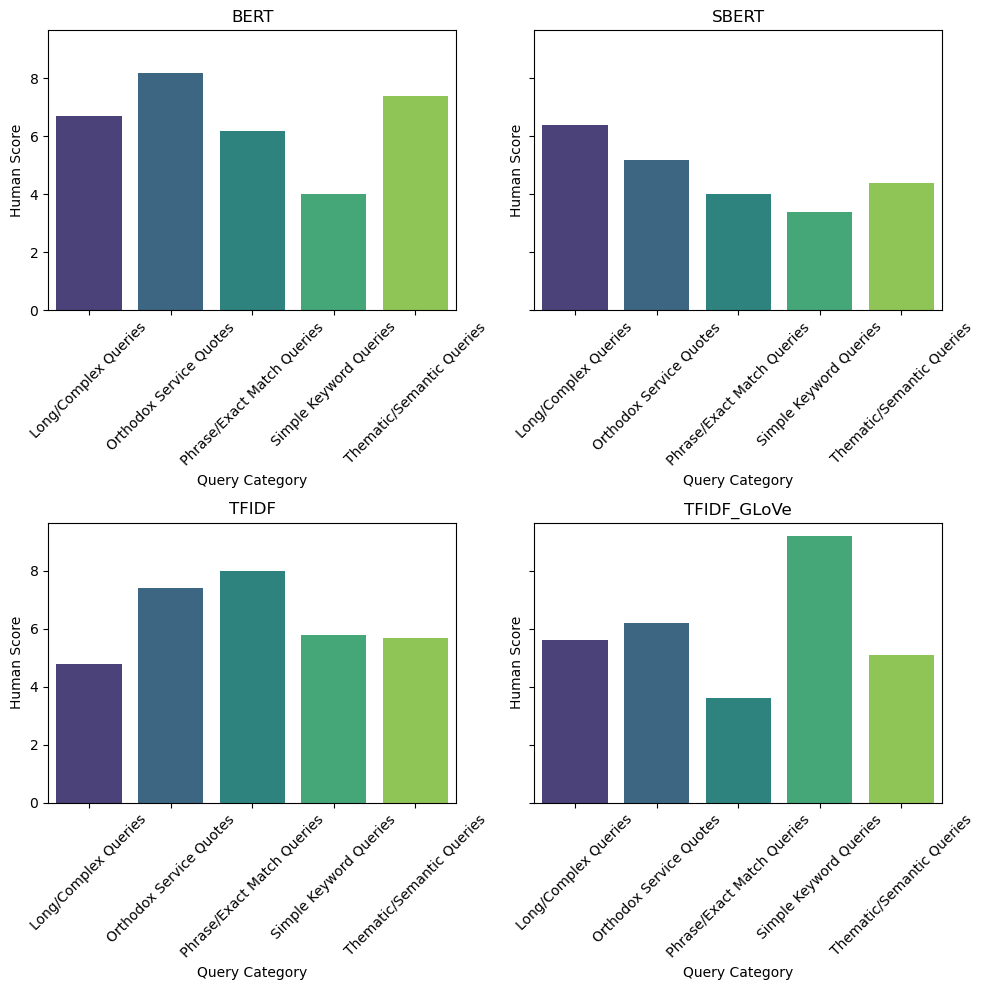

In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Pivot table
pivot = pd.pivot_table(
    scores,
    index=["Method", "Query Category"],
    values="Human Score",
    aggfunc='mean'
).reset_index()

# Unique methods
methods = pivot['Method'].unique()
n_methods = len(methods)

# Determine layout: 2 rows
n_rows = 2
n_cols = math.ceil(n_methods / n_rows)

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 5*n_rows), sharey=True)
axes = axes.flatten()  # flatten in case of 2D array

# Plot each method
for ax, method in zip(axes, methods):
    subset = pivot[pivot['Method'] == method]
    sns.barplot(
        data=subset,
        x='Query Category',
        y='Human Score',
        ax=ax,
        palette='viridis'
    )
    
    
    ax.set_title(method)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    ax.set_xlabel("Query Category")
    ax.set_ylabel("Human Score")

# Turn off any unused axes
for ax in axes[n_methods:]:
    ax.axis('off')

plt.tight_layout()
plt.show()


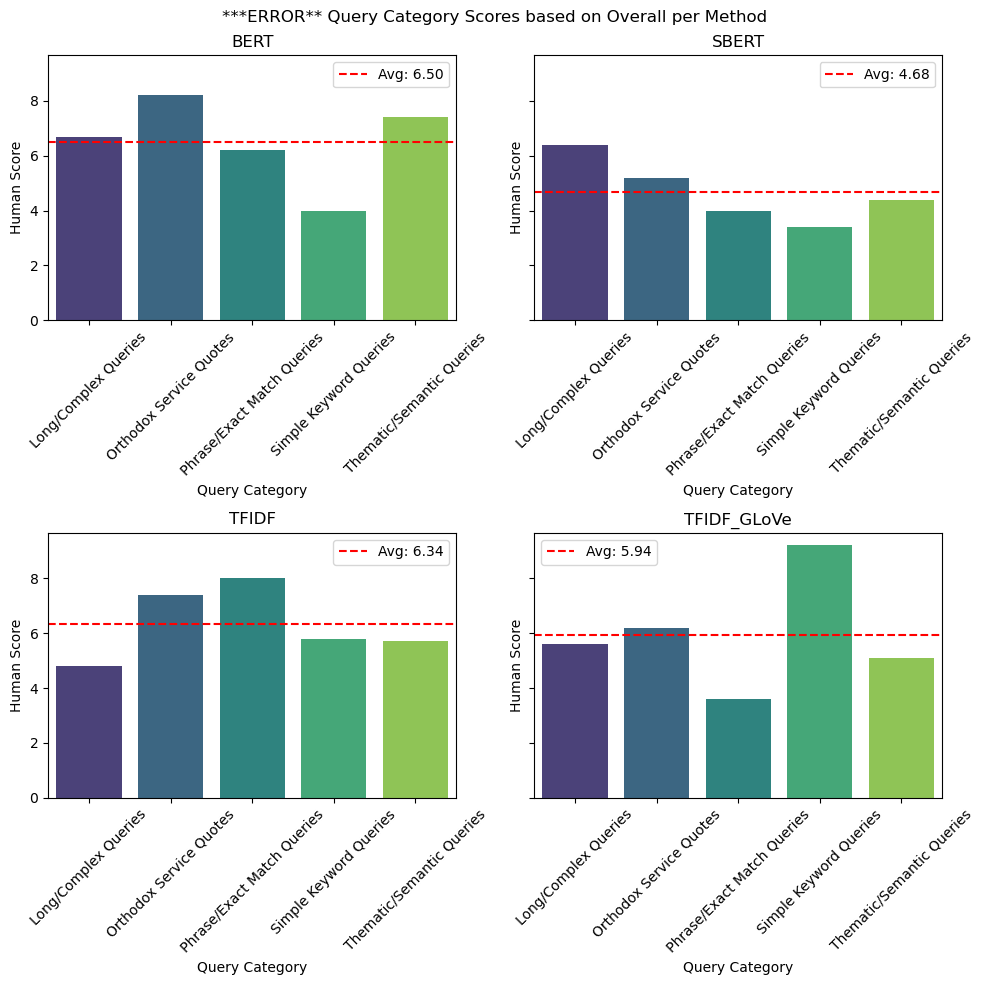

In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Pivot table
pivot = pd.pivot_table(
    scores,
    index=["Method", "Query Category"],
    values="Human Score",
    aggfunc='mean'
).reset_index()

# Unique methods
methods = pivot['Method'].unique()
n_methods = len(methods)

# Determine layout: 2 rows
n_rows = 2
n_cols = math.ceil(n_methods / n_rows)

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 5*n_rows), sharey=True)
axes = axes.flatten()  # flatten in case of 2D array

# Plot each method
for ax, method in zip(axes, methods):
    subset = pivot[pivot['Method'] == method]
    
    # Bar plot
    sns.barplot(
        data=subset,
        x='Query Category',
        y='Human Score',
        ax=ax,
        palette='viridis'
    )
    
    # Compute overall average for this method
    method_avg = subset['Human Score'].mean()
    
    # Add horizontal line
    ax.axhline(method_avg, color='red', linestyle='--', label=f"Avg: {method_avg:.2f}")
    
    # Title and labels
    ax.set_title(method)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    ax.set_xlabel("Query Category")
    ax.set_ylabel("Human Score")
    
    # Optional: add legend for the line
    ax.legend()


# Turn off any unused axes
for ax in axes[n_methods:]:
    ax.axis('off')
    
fig.suptitle("***ERROR** Query Category Scores based on Overall per Method")
plt.tight_layout()
plt.show()


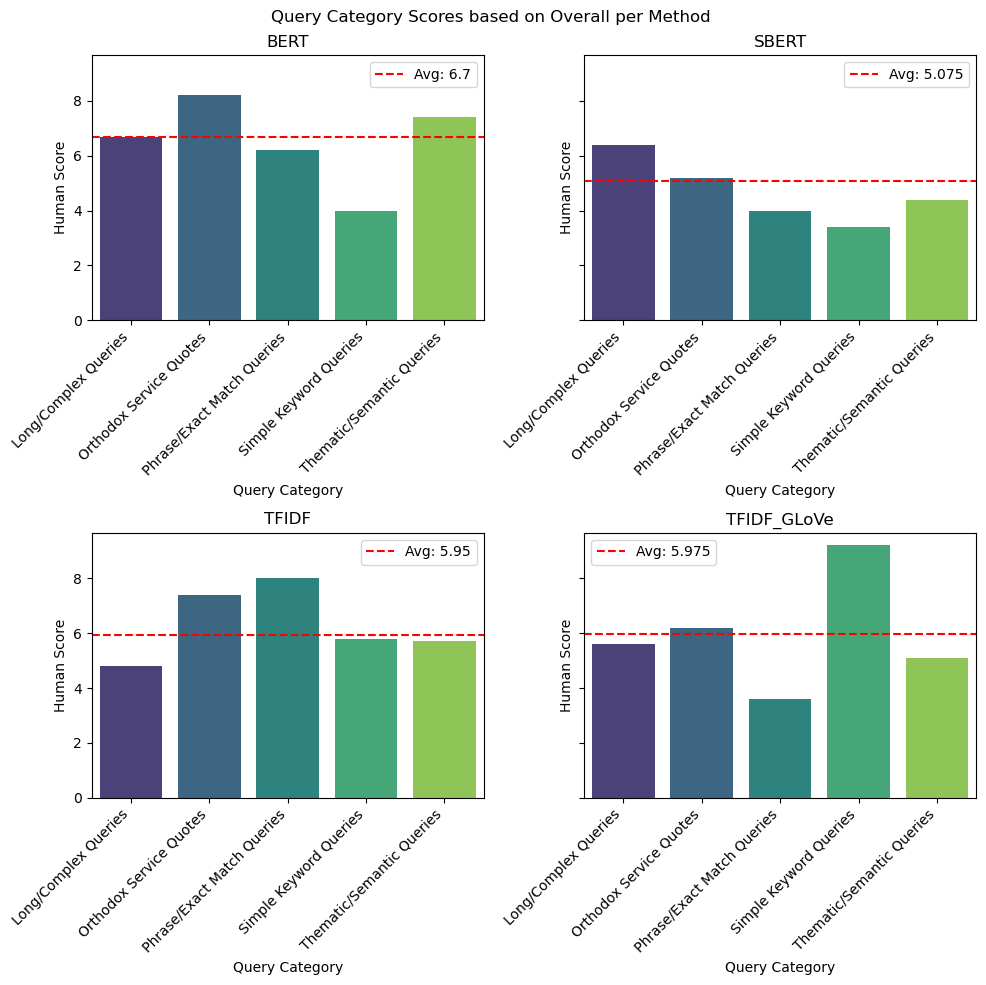

In [102]:
import math
import matplotlib.pyplot as plt
import seaborn as sns

# Pivot table for plotting by method & query category
pivot = pd.pivot_table(
    scores,
    index=["Method", "Query Category"],
    values="Human Score",
    aggfunc='mean'
).reset_index()

methods = pivot['Method'].unique()
n_methods = len(methods)

# Layout: 2 rows
n_rows = 2
n_cols = math.ceil(n_methods / n_rows)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 5*n_rows), sharey=True)
axes = axes.flatten()

for ax, method in zip(axes, methods):
    subset = pivot[pivot['Method'] == method]

    sns.barplot(
        data=subset,
        x='Query Category',
        y='Human Score',
        ax=ax,
        palette='viridis'
    )

    # Use your pivot table to get the method average
    method_avg = overall.loc[method, "Human Score"]
    
    ax.axhline(method_avg, color='red', linestyle='--', label=f"Avg: {method_avg:.4}")

    ax.set_title(method)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    ax.set_xlabel("Query Category")
    ax.set_ylabel("Human Score")
    ax.legend()

# Turn off unused axes
for ax in axes[n_methods:]:
    ax.axis('off')

fig.suptitle("Query Category Scores based on Overall per Method")

plt.tight_layout()
plt.show()


In [87]:
overall

,Human Score
Method,
BERT,6.700
SBERT,5.075
TFIDF,5.950
TFIDF_GLoVe,5.975
